In [119]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ClassificationReport,ConfusionMatrix
from sklearn.linear_model import Ridge,Lasso
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection
from sklearn import metrics

In [120]:
df=pd.read_csv('USA_Housing.csv') # Load the data from a csv file

In [121]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [122]:
df.info() # Summary of the Data Frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


Since we are working with numerical data.So we are dropping the "Address" column from our Data Frame.We can also convert our text data to numerical data using pandas method pd.get_dummies().But for now "Address" is not significant

In [123]:
df.drop('Address',axis=1,inplace=True)  # Data CLeaning

Now since we are predicting the Price of the houses.So our label would be "Price" column from our data frame.All other columns would be our features.  

In [127]:
X=df.drop('Price',axis=1)
y=df['Price']

Yellowbrick is an open source, Python project that extends the scikit-learn API with visual analysis and diagnostic tools. The Yellowbrick API also wraps matplotlib to create interactive data explorations.

It extends the scikit-learn API with a new core object: the Visualizer. Visualizers allow visual models to be fit and transformed as part of the scikit-learn pipeline process, providing visuals throughout the transformation of high-dimensional data.


Rank 2D, performs pairwise feature analysis as a heatmap. The default ranking algorithm is pearson, but we can also use the covariance score:


In [128]:
from yellowbrick.features import Rank2D,RadViz

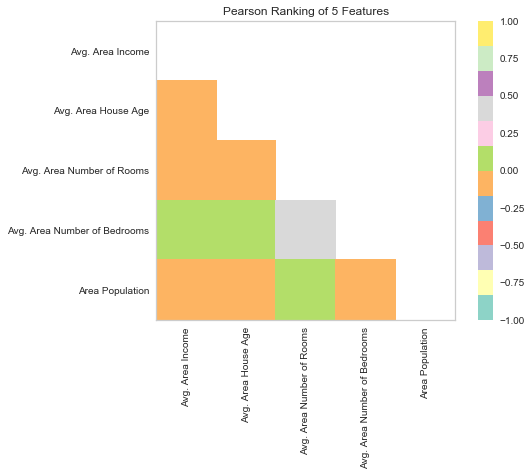

In [129]:
visualizer=Rank2D(features=X.columns,algorithm='pearson',colormap='Set3')
visualizer.fit(X, y)                
visualizer.transform(X)             
visualizer.poof()

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101) #Train_Test Split

A residual is a difference between the target and predicted values, i.e. the error of the prediction. The ResidualsPlot Visualizer shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis, allowing you to detect regions within the target that may be susceptible to more or less error. It also enables visualizing the train and test data with different colors.


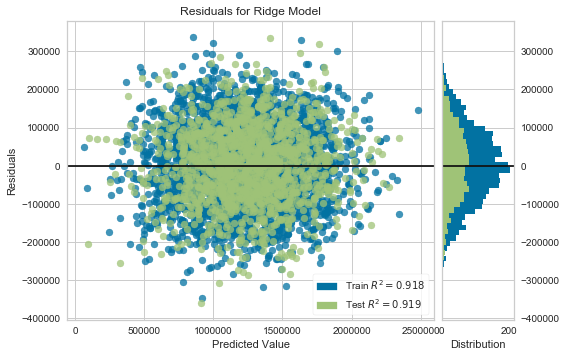

In [131]:
model=Ridge()  #Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity.
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test) 
g = visualizer.poof()

#R square is coefficient of determination telling how well our model performs for future data


In [135]:
model = Lasso() 
""""Lasso regression is a type of linear regression that uses shrinkage. 
Shrinkage is where data values are shrunk towards a central point, like the mean."""

visualizer = PredictionError(model)

The Prediction Error Visualizer visualizes prediction errors as a scatterplot of the predicted and actual values. We can then visualize the line of best fit and compare it to the 45º line.


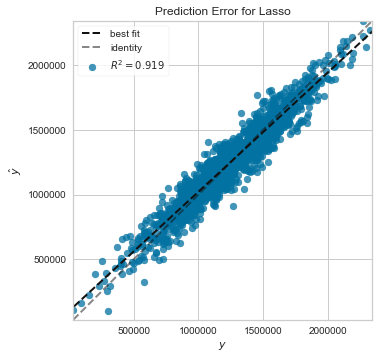

In [136]:
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()                 

The AlphaSelection Visualizer demonstrates how different alpha values influence model selection during the regularization of linear models. A higher alpha value denotes a less complex model, and vice versa, decreasing the error due to variance (overfit).
However, alphas that are too high increase the error due to bias (underfit). Therefore, it’s important to choose an optimal alpha so that the error is minimized in both directions.


α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. α can take various values: α = 0: The objective becomes same as simple linear regression. We'll get the same coefficients as simple linear regression.

In [99]:
alphas = np.logspace(-10, 1, 100)

In [97]:
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)

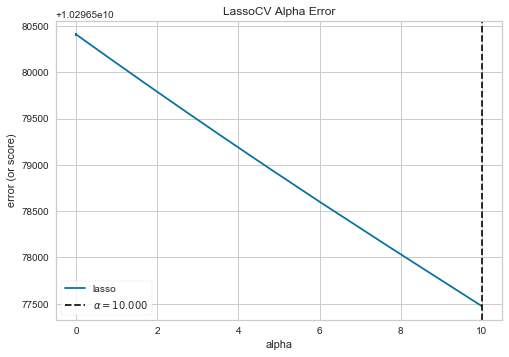

In [98]:
visualizer.fit(X_train, y_train)
g = visualizer.poof()